### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
# %load_ext autoreload


# %autoreload
# %reload_ext autoreload 

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

# Compile the main simulator code using cython 

In [3]:
!python setup.py build_ext --inplace

running build_ext
running build_ext


# Import all the relevant files 

In [4]:
# Import the pipeline creation object
import pandas as pd
import numpy as np
import cbgt as cbgt
import pipeline_creation as pl_creat
import plotting_functions as plt_func
import plotting_helper_functions as plt_help
import postprocessing_helpers as post_help


import importlib

importlib.reload(plt_help)
importlib.reload(plt_func)
importlib.reload(post_help)

2023-04-26 12:52:00,685	INFO worker.py:842 -- Connecting to existing Ray cluster at address: 172.26.3.122:6379


<module 'postprocessing_helpers' from '/home/jyotika/Work/CBGTPy_release/CBGTPy/postprocessing_helpers.py'>

# Choose the experiment and create the main pipeline

In [5]:
# Choose the experiment
experiment_choice = "plastic"

# Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experiment_choice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

# how many simulations do you want to run ? each simulation is executed as a seperate thread

num_sims = 1

# set a seed
import time
np.random.seed(int(time.time()))
# seed = np.random.choice(np.random.randint(0,9999999,100),1)[0]
seed = 8867366
print(seed)


in choose pipeline
in reward pipeline
8867366


In [6]:
#Import core functions

# from frontendhelpers import * 
# from tracetype import *
# import qvalues as qval
# import generateepochs as gen
# from agentmatrixinit import *

# import pipeline_creation as pl_creat

# Import plotting functions
# import matplotlib.pyplot as plt

# Define the data and figure directory

data_dir = "./Data/"
figure_dir = "./Figures/"


# Running the pipeline

### 1. Default values of environment variable

In [9]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'experimentchoice': experiment_choice,
    'inter_trial_interval': None, # default = 600ms
    'thalamic_threshold': None, # default 30sp/s
    'movement_time':None,# #default sampled from N(250,1.5), ["constant",250], ["mean",250]
    'choice_timeout':None, #wait for a choice to be made, default 1000, 
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    #'dpmns' : pd.DataFrame([0.05], columns=['dpmn_wmax']),
    #'d1' : None, #D1-MSNs population related parameters (init_params.py)
    'd1': None,#pd.DataFrame([[39.5,0.055]], columns=['dpmn_alphaw','dpmn_wmax']),
    'd2': None, #pd.DataFrame([[-38.2,0.035]], columns=['dpmn_alphaw','dpmn_wmax']),
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' :None,
    'Q_support_params': None,#pd.DataFrame([[85,0.6]],columns=['dpmn_CPP_scale','q_alpha']), #initialization of Q-values update (qvalues.py) 
    'Q_df_set':pd.DataFrame([[0.5, 0.5]],columns=["left","right"]), #initialized Q-values df (qvalues.py)  
    'n_trials': 4, #number of trials (generateepochs.py)
    'volatility': [2,"exact"], #frequency of changepoints and type of change points (exact or poisson) (generateepochs.py)
    'conflict': (1.0, 0.0), #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.01, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.8, # 3 instead? how much stimulus the LIP gets at maximum
    'corticostriatal_plasticity_present':"on", # whether plasticity is on or "off" at corticostriatal synapses
    'record_variables':["weight"],#"optogenetic_input"],
    'opt_signal_present':False,
    'opt_signal_probability':[0,2], # probability of trials that will get the optogenetic signal / list of trial numbers
    'opt_signal_amplitude':0.1, # ampitude of the stop signal over base line
    'opt_signal_onset':20., # in ms
    'opt_signal_duration':100.,
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["D1STR"],
    'sustainedfraction':0.3
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
}


### Run the simulation - 1 thread with the environment variable

In [10]:
# def _run_thread_exp(i_iter):
#     import cbgt as cbgt
#     import pandas as pd
#     import numpy as np
#     import cbgt as cbgt
#     import pipeline_creation as pl_creat
#     import plotting_functions as plt_func
#     import plotting_helper_functions as plt_help
#     import postprocessing_helpers as post_help
#     # Choose the experiment
#     experiment_choice = "plastic"

#     # Call choose_pipeline with the pipeline object
#     pl_creat.choose_pipeline(experiment_choice)

#     #Create the main pipeline
#     pl = pl_creat.create_main_pipeline(runloop=True)


#     seed = np.random.choice(np.random.randint(0,9999999,100),1)[0]

#     results=cbgt.ExecutionManager(cores=1).run([pl]*1,[environment]*1)
#     return(results)

In [11]:
# from joblib import delayed, Parallel

# res = Parallel(n_jobs=3)(delayed(_run_thread_exp)(ii) for ii in range(9))

In [12]:
# pl.modulelist

In [13]:
results = cbgt.ExecutionManager(cores=7).run([pl]*num_sims,[environment]*num_sims)


SpawnThreadManagers <backend.Pipeline object at 0x7f7c497c23a0>
(worker pid=3443646) in choose pipeline
(worker pid=3443646) conflict (1.0, 0.0)
(worker pid=3443646) change points: [0 2 3]
(worker pid=3443646) conflict (1.0, 0.0)
(worker pid=3443646) in choose pipeline
(worker pid=3443646) conflict (1.0, 0.0)
(worker pid=3443646) change points: [0 2 3]
(worker pid=3443646) conflict (1.0, 0.0)
SpawnThreadManagers <backend.Pipeline object at 0x7f7c49776250>
(worker pid=3443646) begin GenOptSchedule
(worker pid=3443646) <class 'list'>
(worker pid=3443646) [0, 2]
(worker pid=3443646) pop D1STR
(worker pid=3443646) True
(worker pid=3443646) pop D1STR
(worker pid=3443646) True
(worker pid=3443646) opt_df
(worker pid=3443646)    opt_signal_present  ... opt_signal_population
(worker pid=3443646) 0               False  ...               [D1STR]
(worker pid=3443646) 
(worker pid=3443646) [1 rows x 4 columns]
(worker pid=3443646) opt_channels_df
(worker pid=3443646)     left  right  trial_num
(wo

(worker pid=3443646) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=3443646)   Q_df = Q_df.append(
(worker pid=3443646) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=3443646)   Q_df = Q_df.append(
(worker pid=3443646) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=3443646)   Q_df = Q_df.append(
(worker pid=3443646) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:127: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=3443646)   Q_df

(worker pid=3443646) agent.opt_popids [6 7]
(worker pid=3443646) agent.opt_popids [6 7]
(worker pid=3443646) phasetimer 171
(worker pid=3443646) gateFRs [24.88888889 31.11111111]
(worker pid=3443646) thresholds_crossed [1]
(worker pid=3443646) phasetimer 171
(worker pid=3443646) gateFRs [24.88888889 31.11111111]
(worker pid=3443646) thresholds_crossed [1]
(worker pid=3443646) trial_num 0
(worker pid=3443646) chosen_action right
(worker pid=3443646) trial_num 0
(worker pid=3443646) q_val_chosen [0.5]
(worker pid=3443646) da_inc [-0.5]
(worker pid=3443646) Q_df updated
(worker pid=3443646) scaled dopamine signal -50.0
(worker pid=3443646) trial_num 0
(worker pid=3443646) chosen_action right
(worker pid=3443646) trial_num 0
(worker pid=3443646) q_val_chosen [0.5]
(worker pid=3443646) da_inc [-0.5]
(worker pid=3443646) Q_df updated
(worker pid=3443646) scaled dopamine signal -50.0
(worker pid=3443646) phasetimer 146
(worker pid=3443646) gateFRs [30.22222222 21.77777778]
(worker pid=3443646

In [17]:
# List all the agent variables accessible
results[0].keys()

dict_keys(['experimentchoice', 'inter_trial_interval', 'thalamic_threshold', 'movement_time', 'choice_timeout', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df_set', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'corticostriatal_plasticity_present', 'record_variables', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_duration', 'opt_signal_channel', 'opt_signal_population', 'sustainedfraction', 'actionchannels', 'trial_wise_movement_times', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'opt_df', 'opt_channels_df', 'opt_amplitude_df', 'opt_onset_df', 'opt_populations_df', 'opt_list_trials', 'connectivity_AMPA', 'meaneff_AMPA', 'plastic_AMPA', 'conn

In [18]:
results[0]['meaneff_GABA']

,GPi,GPi,STNE,STNE,GPeP,GPeP,D1STR,D1STR,D2STR,D2STR,LIP,LIP,Th,Th,FSI,LIPI
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`,0.0`
GPi,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.3315`,0.0`,0.0`
STNE,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
STNE,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPeP,0.058`,0.0`,0.35`,0.0`,1.75`,1.75`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
GPeP,0.0`,0.058`,0.0`,0.35`,1.75`,1.75`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D1STR,2.09`,0.0`,0.0`,0.0`,0.0`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D1STR,0.0`,2.09`,0.0`,0.0`,0.0`,0.0`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D2STR,0.0`,0.0`,0.0`,0.0`,4.07`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`
D2STR,0.0`,0.0`,0.0`,0.0`,0.0`,4.07`,0.0`,0.28`,0.0`,0.28`,0.0`,0.0`,0.0`,0.0`,0.0`,0.0`


In [19]:
results[0]['conflict']

(1.0, 0.0)

In [20]:
results[0]['Q_df']

,left,right
0,0.500000,0.500
0,0.500000,0.375
0,0.622557,0.375
0,0.466918,0.375
0,0.599810,0.375


In [21]:
results[0]['popfreqs']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Time (ms)
0,67.333333,67.111111,24.800000,25.377778,62.133333,57.711111,3.555556,3.333333,4.888889,6.222222,0.000000,0.000000,6.444444,6.000000,7.777778,0.627240,0
1,67.333333,68.444444,24.622222,25.288889,61.466667,57.177778,4.000000,3.111111,5.333333,6.222222,0.000000,0.000000,6.666667,5.777778,7.555556,0.627240,1
2,67.333333,68.888889,24.866667,25.288889,61.044444,57.422222,4.000000,3.111111,5.333333,6.000000,0.000000,0.000000,6.666667,5.777778,7.333333,0.627240,2
3,68.222222,69.555556,25.088889,25.444444,60.822222,57.622222,4.222222,3.111111,5.333333,6.222222,0.000000,0.000000,6.666667,5.555556,7.555556,0.627240,3
4,67.555556,70.222222,25.044444,25.511111,60.800000,57.555556,4.444444,3.111111,5.333333,6.222222,0.000000,0.000000,7.111111,5.555556,7.555556,0.627240,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3958,62.000000,60.222222,23.844444,26.244444,64.288889,56.533333,4.888889,7.111111,4.222222,5.333333,0.653595,0.980392,9.333333,12.222222,8.666667,1.254480,3958
3959,61.777778,59.333333,23.888889,26.288889,64.266667,56.800000,4.888889,7.111111,4.222222,5.555556,0.653595,1.062092,9.555556,11.555556,8.444444,1.254480,3959
3960,60.444444,58.888889,23.955556,26.244444,64.244444,57.000000,5.111111,7.111111,4.000000,5.555556,0.571895,1.062092,9.777778,11.333333,8.666667,1.344086,3960
3961,60.222222,57.777778,24.177778,26.355556,64.400000,57.066667,5.111111,7.111111,4.222222,5.555556,0.571895,1.062092,9.777778,11.333333,8.444444,1.344086,3961


In [22]:
#Extract all the relevant dataframes
firing_rates, reward_q_df, performance, rt_dist, total_performance = plt_help.extract_relevant_frames(results,seed)

/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = Q_df_local.append(rew_df)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:116: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(chosen_action)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:117: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data = final_data.append(block)
/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:144: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perf = perf.append({'%_rewarded_actio

In [23]:
# firing rates  
firing_rates[0]

,Time (ms),variable,firing_rate,nuclei,channel,seed,n_trials,volatility,volatility_type,conflict
0,0,GPi_left,67.333333,GPi,left,8867366_0,4.0,2.0,exact,"(1.0, 0.0)"
1,1,GPi_left,67.333333,GPi,left,8867366_0,4.0,2.0,exact,"(1.0, 0.0)"
2,2,GPi_left,67.333333,GPi,left,8867366_0,4.0,2.0,exact,"(1.0, 0.0)"
3,3,GPi_left,68.222222,GPi,left,8867366_0,4.0,2.0,exact,"(1.0, 0.0)"
4,4,GPi_left,67.555556,GPi,left,8867366_0,4.0,2.0,exact,"(1.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...
63403,3958,CxI_common,1.254480,CxI,common,8867366_0,4.0,2.0,exact,"(1.0, 0.0)"
63404,3959,CxI_common,1.254480,CxI,common,8867366_0,4.0,2.0,exact,"(1.0, 0.0)"
63405,3960,CxI_common,1.344086,CxI,common,8867366_0,4.0,2.0,exact,"(1.0, 0.0)"
63406,3961,CxI_common,1.344086,CxI,common,8867366_0,4.0,2.0,exact,"(1.0, 0.0)"


In [24]:
performance

,%_rewarded_actions,%_action,actions,block,seed,n_trials,volatility,volatility_type,conflict,condition
0,100.0,50.0,left,left,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control
1,0.0,25.0,right,left,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control
2,0.0,25.0,left,right,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control


In [25]:
recorded_variables = post_help.extract_recording_variables(results,results[0]['record_variables'],seed)

In [26]:
recorded_variables['weight']

,weights,trials,nuclei,seed
0,0.014237,0,D1-left,8867366_0
1,0.037536,1,D1-left,8867366_0
2,0.042226,2,D1-left,8867366_0
0,0.020145,0,D2-left,8867366_0
1,0.022404,1,D2-left,8867366_0
2,0.028368,2,D2-left,8867366_0
0,0.012327,0,D1-right,8867366_0
1,0.028403,1,D1-right,8867366_0
2,0.038430,2,D1-right,8867366_0
0,0.024483,0,D2-right,8867366_0


In [27]:
# recorded_variables['optogenetic_input']

<AxesSubplot:xlabel='trials', ylabel='weights'>

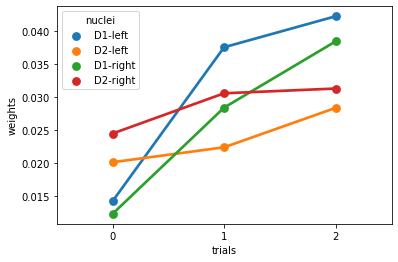

In [28]:
import seaborn as sns
import pylab as pl
sns.pointplot(x="trials",y="weights",hue="nuclei",data=recorded_variables['weight'])


In [29]:
# pl.figure()
# sns.lineplot(x="Time(ms)",y="D1STR_left",data=recorded_variables['optogenetic_input'],hue='seed')

In [30]:
# Relevant reward_dataframe
reward_q_df[0]

,level_0,index,Trials,variable,value,data_type,seed,n_trials,volatility,volatility_type,conflict,condition
0,0,5,0,left,0.500000,Q_df,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control
1,1,6,1,left,0.500000,Q_df,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control
2,2,7,2,left,0.622557,Q_df,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control
3,3,8,3,left,0.466918,Q_df,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control
4,4,9,4,left,0.599810,Q_df,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control
5,5,10,0,right,0.500000,Q_df,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control
6,6,11,1,right,0.375000,Q_df,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control
7,7,12,2,right,0.375000,Q_df,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control
8,8,13,3,right,0.375000,Q_df,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control
9,9,14,4,right,0.375000,Q_df,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control


In [31]:
performance

,%_rewarded_actions,%_action,actions,block,seed,n_trials,volatility,volatility_type,conflict,condition
0,100.0,50.0,left,left,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control
1,0.0,25.0,right,left,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control
2,0.0,25.0,left,right,8867366_0,4.0,2.0,exact,"(1.0, 0.0)",Control


In [32]:
# Extract the data tables from the agent
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]["decisiondurationplusdelay"]-datatables[0]["decisionduration"]

0    254
1    252
2    252
3    254
dtype: object

In [33]:
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,right,0,171,171,425,425,left,0.0
1,left,1026,1172,146,398,1424,left,1.0
2,left,2025,2154,129,381,2406,right,0.0
3,left,3007,3107,100,354,3361,left,1.0


In [34]:
# Check the Q-values data frame
results[0]['Q_df']

,left,right
0,0.500000,0.500
0,0.500000,0.375
0,0.622557,0.375
0,0.466918,0.375
0,0.599810,0.375


In [35]:
#Save the selected variables of results in the data_dir specified
cbgt.saveResults(results,data_dir+'network_data_'+str(seed)+'.pickle',['popfreqs','popdata','Q_support_params','d1','d2','dpmns','datatables'])
# import os
# os.mkdir(data_dir+str(seed))
# for i in np.arange(len(firing_rates)):
#     firing_rates[i]["seed"] = str(seed)+"_"+str(i)
#     reward_q_df[i]["seed"] = str(seed)+"_"+str(i)
# #     rt_dist[i]["seed"] = str(seed)+"_"+str(i)
# #     total_performance[i]["seed"] = str(seed)+"_"+str(i)
# firing_rates1 = pd.concat(firing_rates)
# reward_q_df1 = pd.concat(reward_q_df)
# firing_rates1.to_csv(data_dir+"/"+str(seed)+"/firing_rates.csv")
# reward_q_df1.to_csv(data_dir+"/"+str(seed)+"/reward_df.csv")
# performance.to_csv(data_dir+"/"+str(seed)+"/performance.csv")
# rt_dist.to_csv(data_dir+"/"+str(seed)+"/rt_dist.csv")
#                     , reward_q_df, performance, rt_dist, total_performance

In [36]:
reward_q_df

[    level_0  index  Trials variable     value      data_type       seed  \
 0         0      5       0     left  0.500000           Q_df  8867366_0   
 1         1      6       1     left  0.500000           Q_df  8867366_0   
 2         2      7       2     left  0.622557           Q_df  8867366_0   
 3         3      8       3     left  0.466918           Q_df  8867366_0   
 4         4      9       4     left  0.599810           Q_df  8867366_0   
 5         5     10       0    right  0.500000           Q_df  8867366_0   
 6         6     11       1    right  0.375000           Q_df  8867366_0   
 7         7     12       2    right  0.375000           Q_df  8867366_0   
 8         8     13       3    right  0.375000           Q_df  8867366_0   
 9         9     14       4    right  0.375000           Q_df  8867366_0   
 10        0      0       0     left  1.018676      reward_df  8867366_0   
 11        1      1       1     left  0.990227      reward_df  8867366_0   
 12        2

In [37]:
# import seaborn as sns
# import matplotlib.pyplot as plt 
# for i in np.arange(len(results)):
#     weights = np.array(results[i]['agent'].hist_w)
#     weights[0]
#     np.shape(weights)
#     reshaped_wts = weights.reshape(len(weights),4)
#     nuc_list = ['D1-left','D2-left','D1-right','D2-right' ]
#     ind_list = [(0,0),(0,1),(1,0),(1,1)]
#     weights_df = pd.DataFrame(columns=["weights","trials","nuclei"])

#     for j in np.arange(4):
#         temp = pd.DataFrame()
#         temp["weights"] = [ np.mean(reshaped_wts[:,j][datatables[0]['stimulusstarttime'][i]:datatables[0]['stimulusstarttime'][i+1]])   for i in np.arange(len(datatables[0])-1) ]
#         #temp["weights"] = [ weights[:,ind_list[j][0],ind_list[j][1],:,:][datatables[0]['stimulusstarttime'][i]:datatables[0]['stimulusstarttime'][i+1]])   for i in np.arange(len(datatables[0])-1) ]
#         temp["trials"] = np.arange(0,len(datatables[0])-1)
#         temp["nuclei"] = nuc_list[j]
#         weights_df = weights_df.append(temp)
    
#    #weights_df.to_csv(data_dir+"Weights_"+str(seed)+".csv")
#     fig,ax = plt.subplots(1,1,figsize=(16,9))
#     sns.pointplot(x="trials",y="weights",hue="nuclei",data=weights_df,ax=ax)
    #fig.savefig(figure_dir+"Weights_"+str(seed)+"_"+str(i)+".png")    

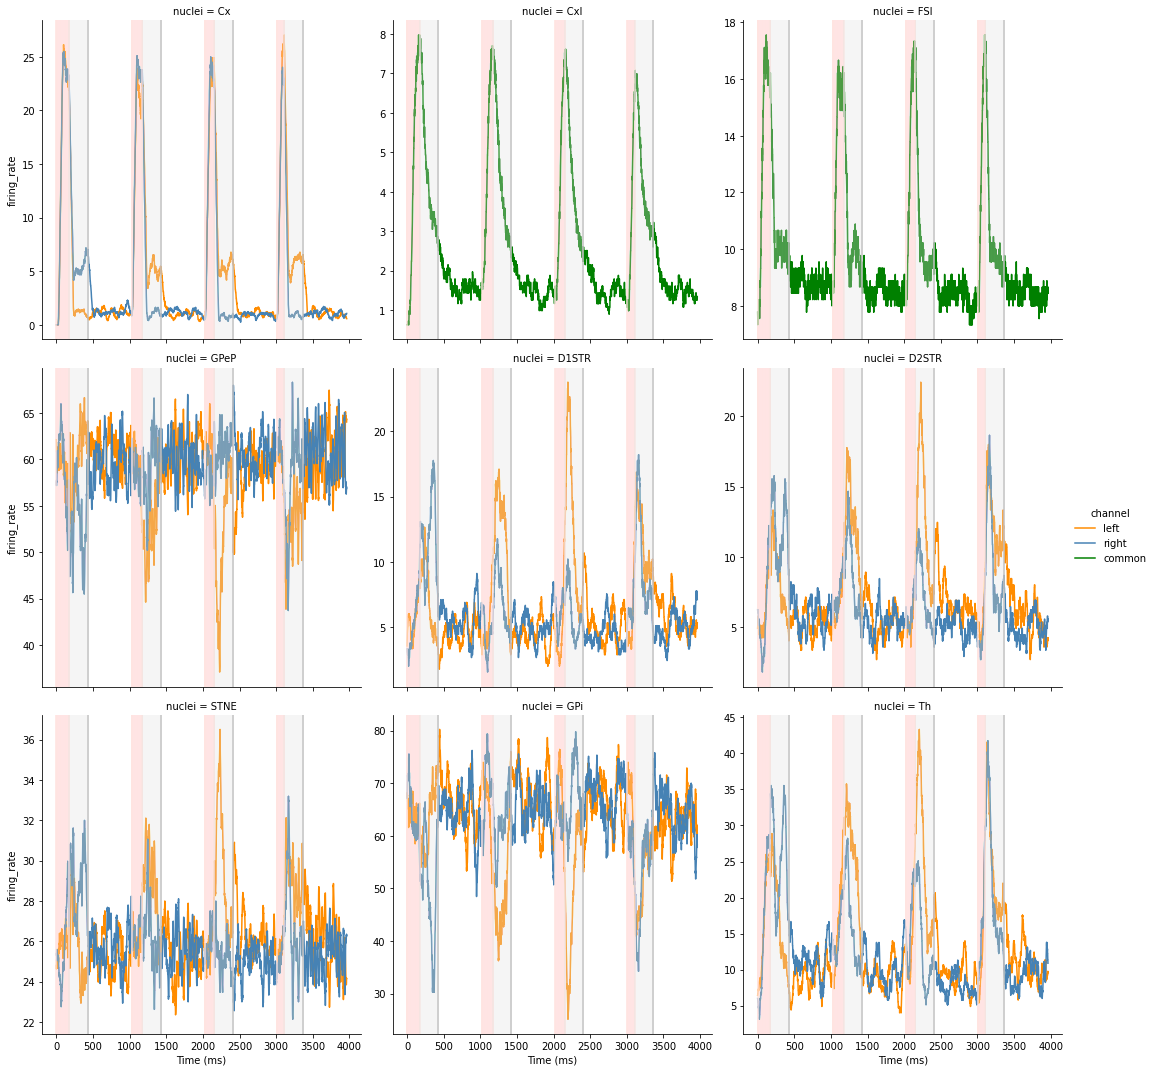

In [38]:
# Plot the firing rates extracted, figure handles are returned in fig_handles

FR_fig_handles = plt_func.plot_fr(firing_rates,datatables)
FR_fig_handles[0].savefig(figure_dir+"Example_FR.pdf",dpi=300)

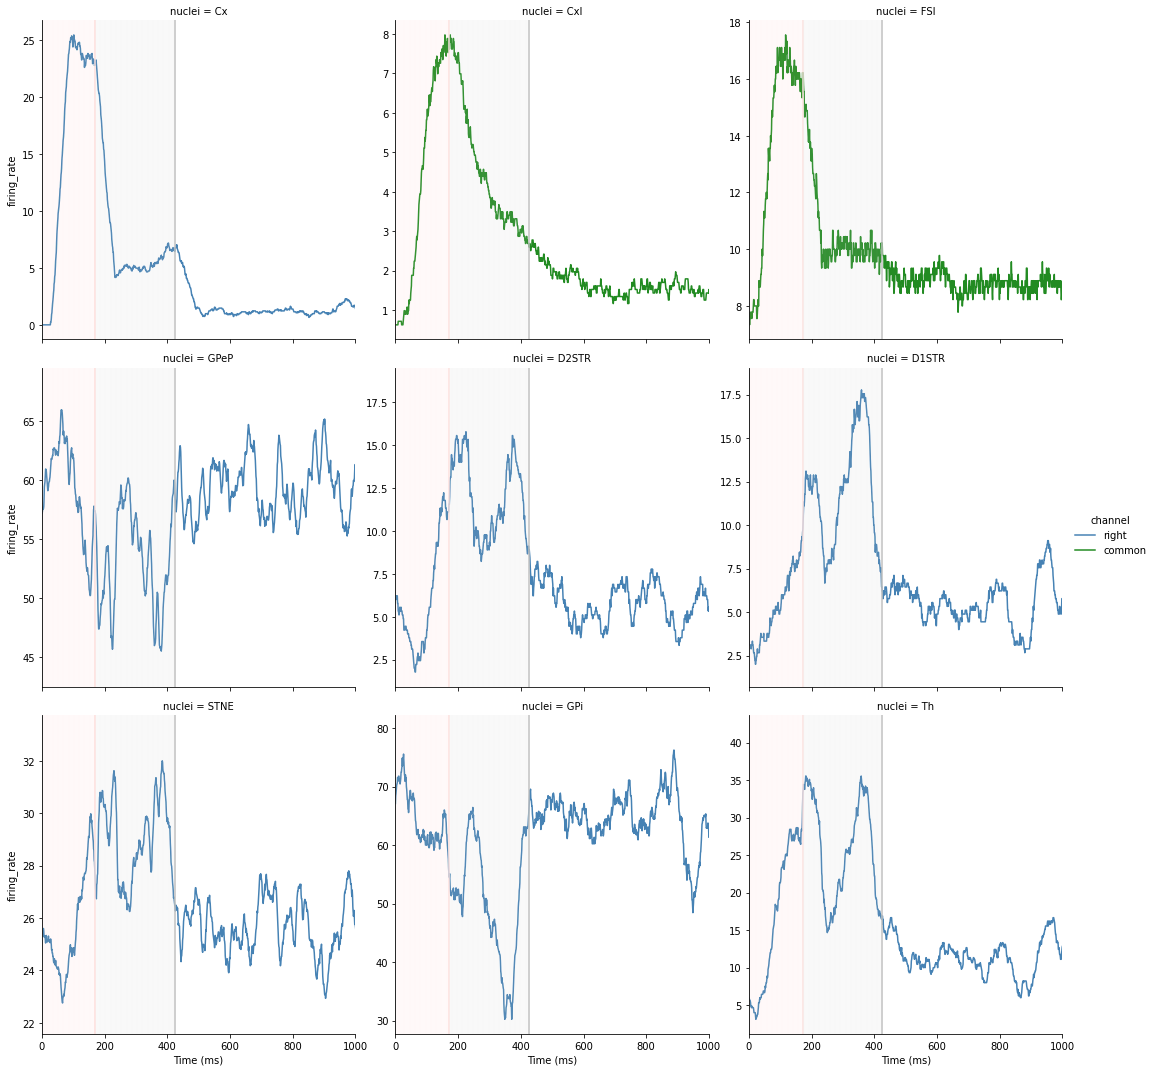

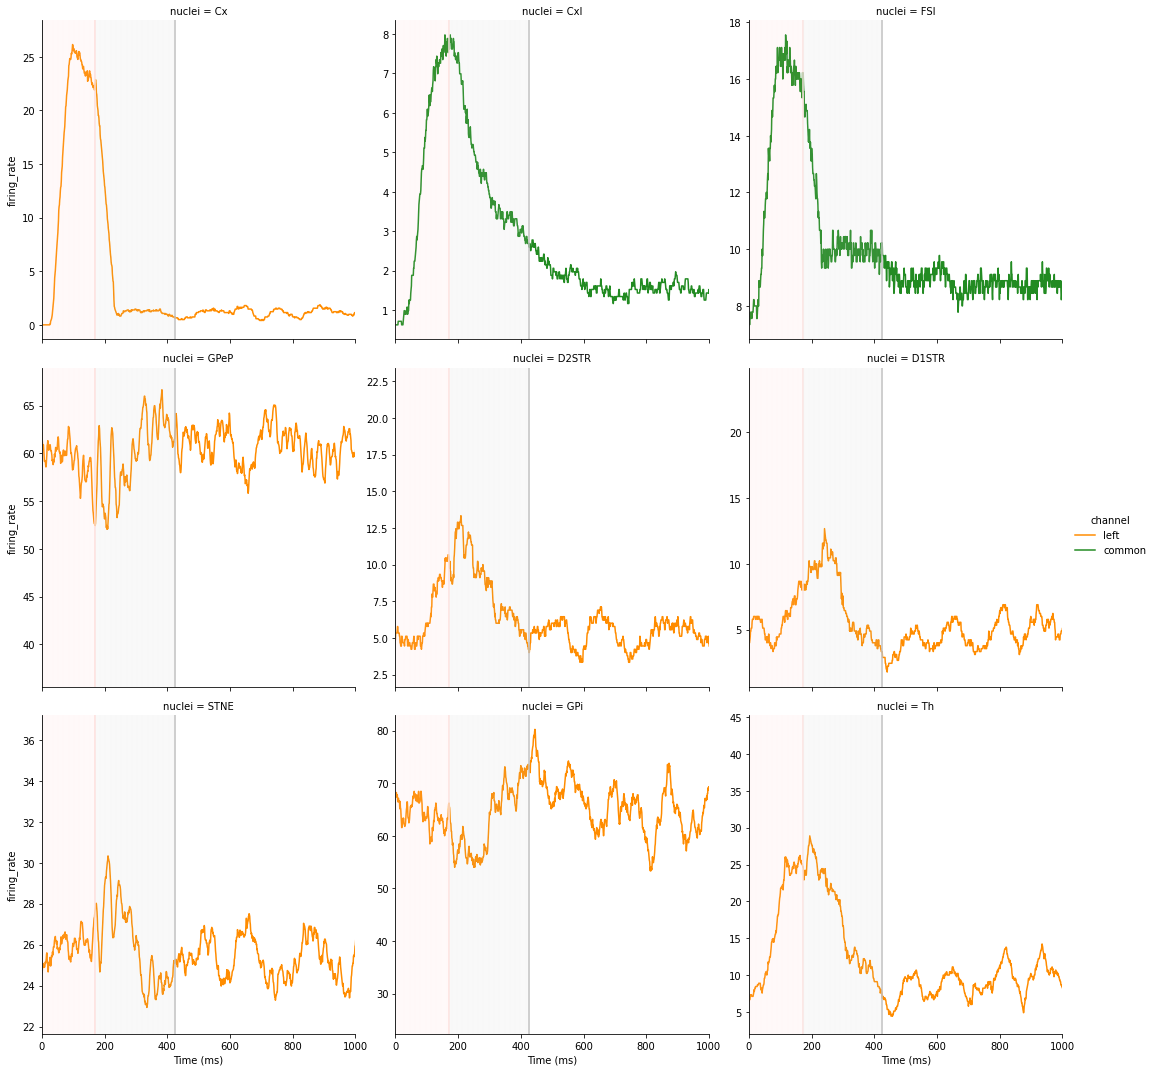

In [39]:
FR_fig_handles_zoom = plt_func.plot_fr_flex(firing_rates[0],datatables[0],['all'], [], (0, 1000)) 

{'left': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), 'right': (1.0, 0.4980392156862745, 0.054901960784313725)}


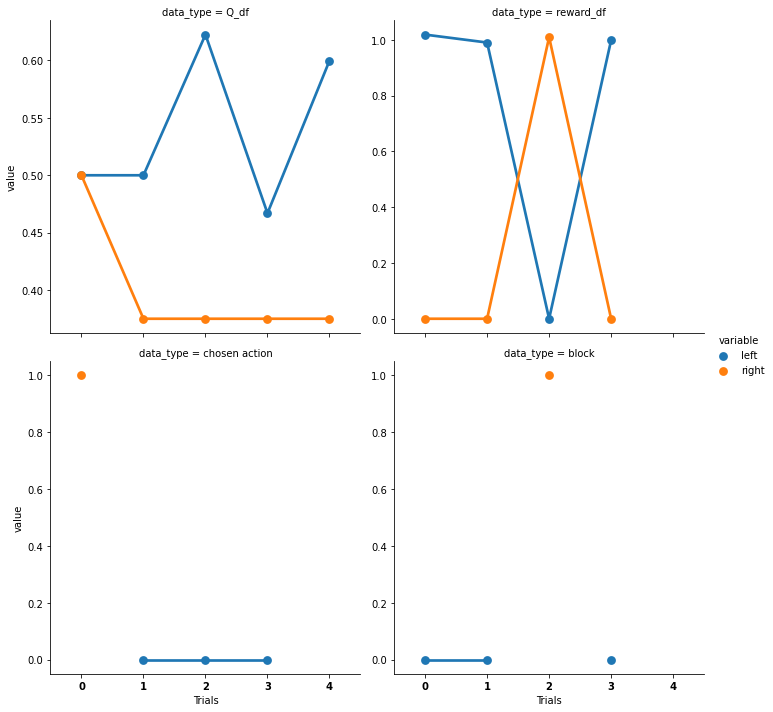

In [40]:
reward_fig_handles = plt_func.plot_reward_Q_df(reward_q_df)

In [ ]:
# inp = np.array(results[0]['agent'].inp)

# fig,ax = pl.subplots(1,2,figsize=(12,9))
# ax[0].plot(inp[:,0],label='Ctx-left-input')
# ax[0].plot(inp[:,1],label='Ctx-right-input')
# ax[0].legend()
# ax[1].plot(popfreqs[i].iloc[:,10],label="Ctx-left-activity",color='r')
# ax[1].plot(popfreqs[i].iloc[:,11],label="Ctx-right-activity",color='g')
# ax[1].plot(popfreqs[i].iloc[:,15],label="Ctx-inhibition",color='c')
# ax[1].legend()
# fig.savefig(figure_dir+"Input_vs_activity_lip"+str(seed)+".png")

In [ ]:
# for i in np.arange(len(results)):
#     fig,ax = plt.subplots(2,3,figsize=(24,16))
#     print(ax)
#     stim_on = datatables[i]["stimulusstarttime"]
#     decision_time = datatables[i]["decisiontime"]
#     weights = np.array(results[i]['agent'].hist_w)
#     Wts = pd.DataFrame.from_records(np.array(results[i]['agent'].hist_w).reshape(len(weights),4),columns=nuc_list)
#     ax[0][0].plot(popfreqs[i].iloc[:,0],label="GPi-left")
#     ax[0][0].plot(popfreqs[i].iloc[:,1],label="GPi-right")

#     ax[0][1].plot(popfreqs[i].iloc[:,12],label="Th-left")
#     ax[0][1].plot(popfreqs[i].iloc[:,13],label="Th-right")
    
#     ax[0][2].plot(popfreqs[i].iloc[:,10],label="Ctx-left")
#     ax[0][2].plot(popfreqs[i].iloc[:,11],label="Ctx-right")

    
#     ax[1][0].plot(popfreqs[i].iloc[:,6],label="D1-left")
#     ax[1][0].plot(popfreqs[i].iloc[:,7],label="D1-right")
#     for k in nuc_list:
#         ax[1][1].plot(Wts[k],label=k)

#     for a in np.hstack(ax):
#         ylims = a.get_ylim()
#         for s,d in zip(stim_on,decision_time):
#             a.vlines(x=s,ymin=ylims[0],ymax=ylims[1],color='k',lw=1.0,ls="solid")
#             a.vlines(x=d,ymin=ylims[0],ymax=ylims[1],color='k',lw=1.0,ls="dashed")
#             a.set_ylim(ylims[0],ylims[1])
#         a.set_xlim(0,3000)
#         a.legend()
#     fig.subplots_adjust(left=0.06,bottom=0.06,right=0.96,top=0.96)
#     fig.savefig(figure_dir+"Zoomed_in_activity_"+str(seed)+"_"+str(i)+".png")